## Introduction

Predicting casualties in a terror attack is a complex and challenging task that involves the analysis of various factors, including the type of attack, target location, and the nature of the weapon used. Machine learning models and statistical analyses can be employed to assess historical data, patterns, and trends to identify potential risk factors and develop predictive models. However, due to the dynamic and unpredictable nature of terrorism, achieving precise predictions is inherently difficult. Ultimately, while predictive tools can contribute to risk assessment, comprehensive counter-terrorism strategies should encompass a multi-faceted approach involving intelligence, international cooperation, and community engagement to enhance overall preparedness and response capabilities.


## Data 
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. Our focus in the project is to focus on terror attacks in Europe.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data file
data = pd.read_excel('globalterrorismdb_0522dist.xlsx')
# print first 5 rows
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# keep only the data for Europe
df = data[data['region_txt'].str.contains('Europe')]

In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
12,197001080001,1970,1,8,NaN,0,NaT,98,Italy,8,...,NaN,NaN,NaN,NaN,Hijacking DB,-9,-9,1,1,NaN
15,197001100001,1970,1,10,NaN,0,NaT,499,East Germany (GDR),9,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
34,197001280001,1970,1,28,NaN,0,NaT,499,East Germany (GDR),9,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
59,197002100001,1970,2,10,NaN,0,NaT,362,West Germany (FRG),8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209639,202012280017,2020,12,28,NaN,0,NaT,167,Russia,9,...,The victims included Magomed Djabrailov.,"""Policeman killed in Chechnya knife attack,"" R...","""One Police Officer, Two Attackers Killed In K...","""Ramzan Kadyrov reports calm situation in Groz...",START Primary Collection,0,0,0,0,NaN
209640,202012280018,2020,12,28,NaN,0,NaT,53,Cyprus,8,...,NaN,"""Bomb Explodes Outside Medical Center in Cypru...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
209682,202012300012,2020,12,30,2020-12-20 00:00:00,0,NaT,167,Russia,9,...,NaN,"""Law Enforcement,"" Russia & CIS Military Weekl...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
209697,202012310010,2020,12,31,NaN,0,NaT,78,Greece,8,...,NaN,"""Nea: The explosion took place near the Athens...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## EDA

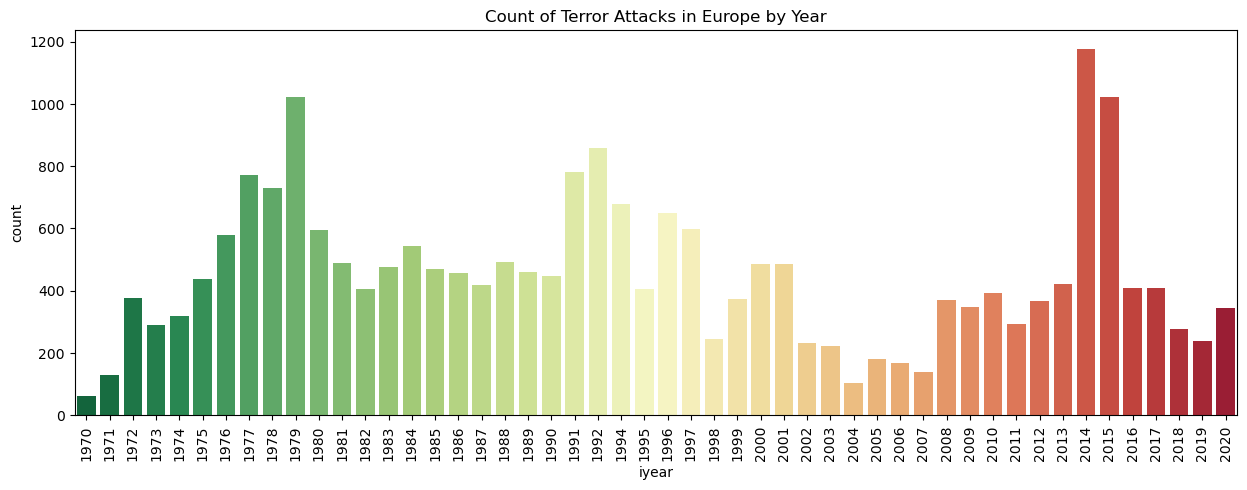

In [5]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='iyear', palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Europe by Year')
plt.show()

> - Europe experienced its highest number of terror attacks during the years 2014 and 2015. While in 1979, the occurrence of terror attacks reached the third-highest number on record.

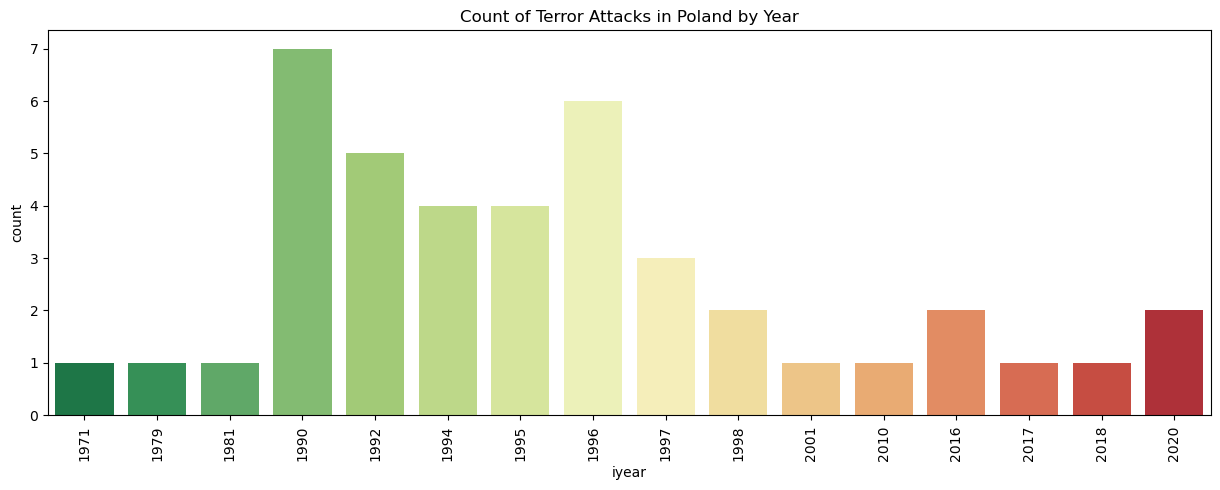

In [6]:
sub_data = df[df['country_txt'] == 'Poland']

plt.figure(figsize=(15, 5))
sns.countplot(data=sub_data, x='iyear', palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Poland by Year')
plt.show()

> - Poland has a relatively low number of terror attacks, with the highest recorded incidence being in 1990, totaling 7 incidents.

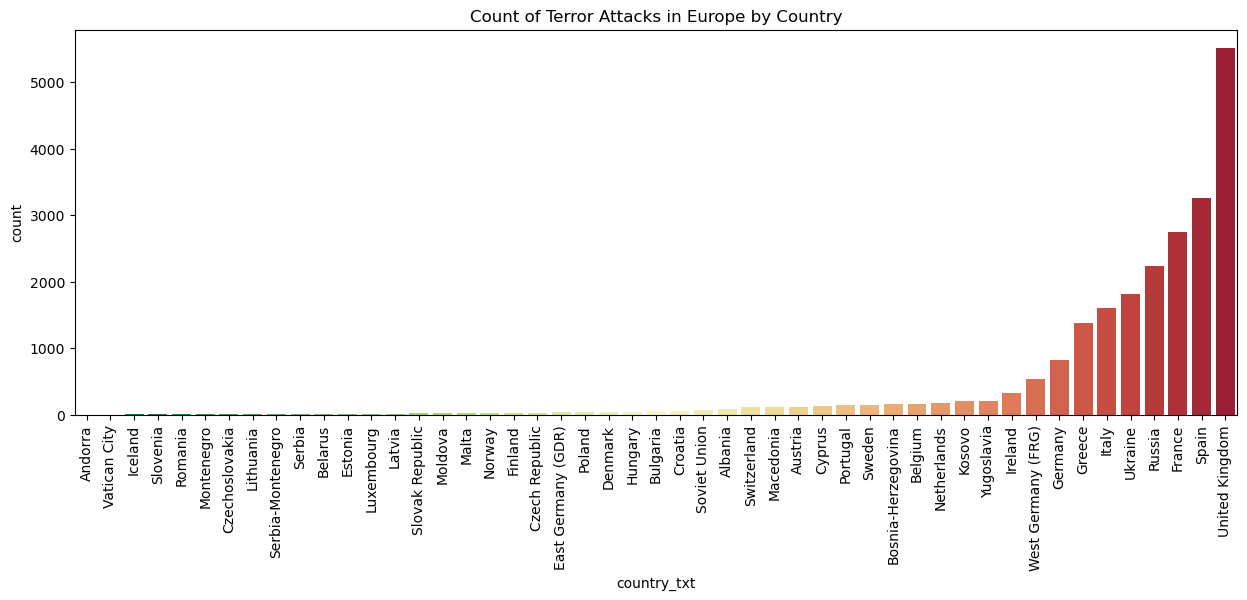

In [7]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='country_txt', palette='RdYlGn_r',
              order=df['country_txt'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Europe by Country')

plt.show()

> - The United Kingdom holds the unfortunate distinction of experiencing the highest number of terror attacks, with Spain ranking second. The disparity in the count is significant, with Spain's incidents representing nearly 50% less than those recorded in the United Kingdom.

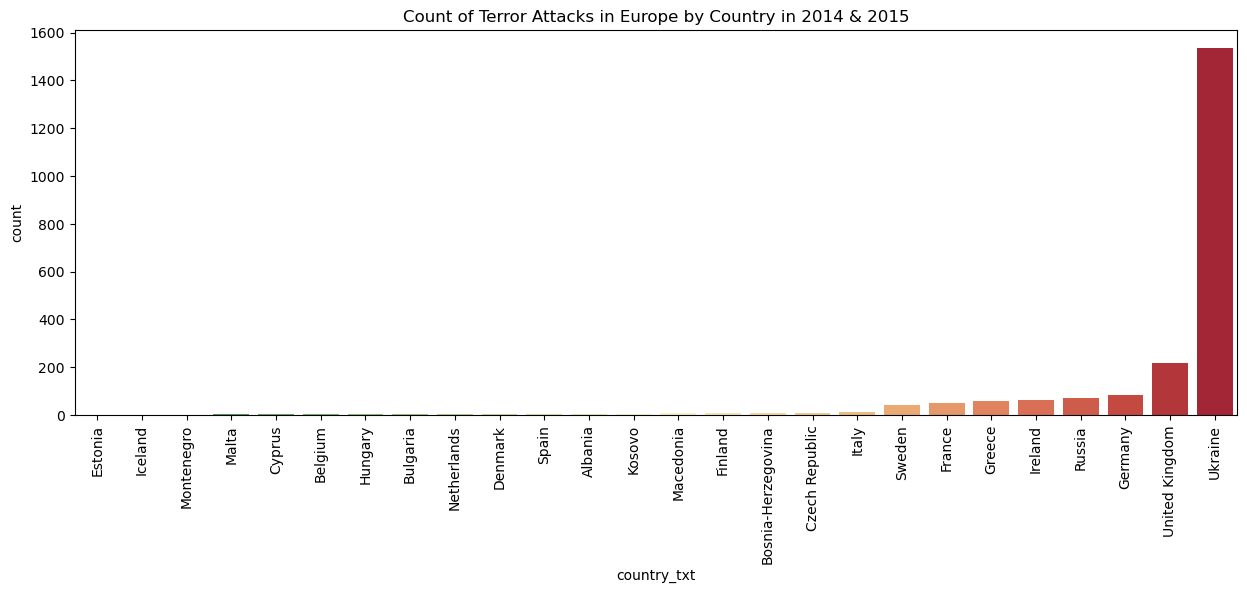

In [8]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=sub_data, x='country_txt', palette='RdYlGn_r',
              order=sub_data['country_txt'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Europe by Country in 2014 & 2015')

plt.show()

> - The years 2014 and 2015 witnessed the highest number of terror attacks, with Ukraine being the country most significantly affected during this period.

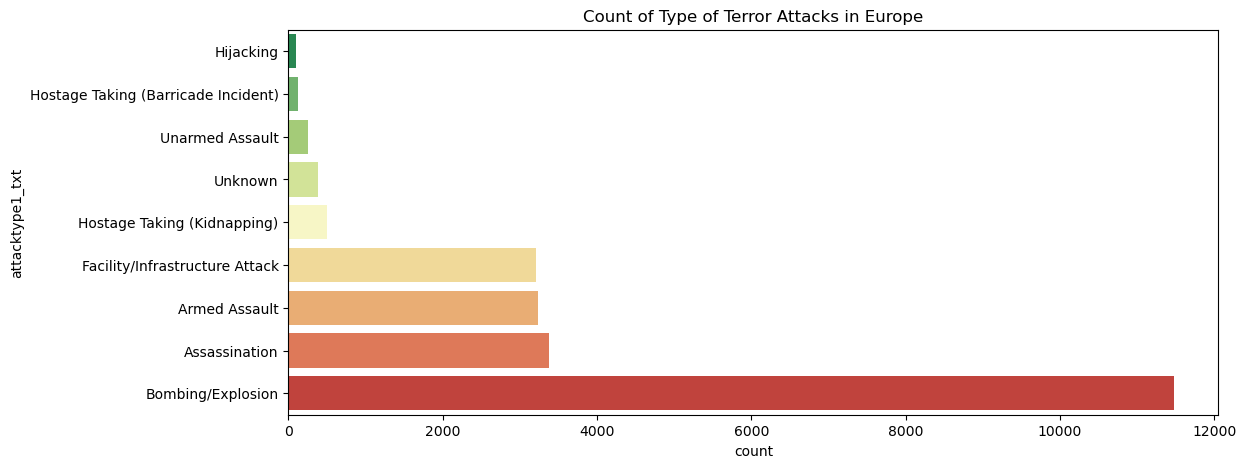

In [9]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='attacktype1_txt', palette='RdYlGn_r',
              order=df['attacktype1_txt'].value_counts().sort_values(ascending=True).index)
plt.title('Count of Type of Terror Attacks in Europe')
plt.show()

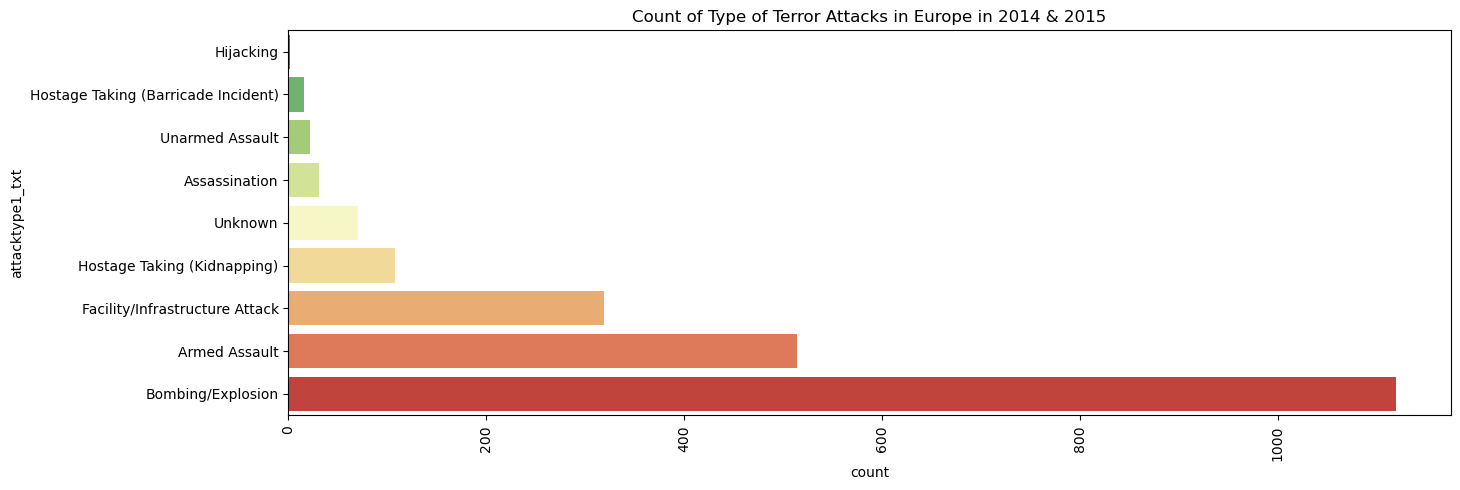

In [10]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=sub_data, y='attacktype1_txt', palette='RdYlGn_r',
              order=sub_data['attacktype1_txt'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Count of Type of Terror Attacks in Europe in 2014 & 2015')

plt.show()

> - Bombing and explosions constitute the most prevalent type of terror attacks.

In [86]:
# Create a choropleth map using Plotly Express
fig = px.choropleth(
    df['country_txt'].value_counts().reset_index(),
    locations='country_txt',
    locationmode='country names',
    color='count', scope='europe',
    color_continuous_scale="reds",
    title='Heatmap of Terror Attacks in Europe',
    labels={'count': 'No. of terror attacks'}
)

# Show the figure
# fig.show(renderer="svg")
fig.show()

In [37]:
# # Create a choropleth map using Plotly Express
fig = px.choropleth(
    data.groupby(['country_txt', 'iyear']).size().reset_index().rename(columns={0: 'count'}).sort_values('iyear'),
    locations='country_txt', animation_frame="iyear",
    locationmode='country names',
    color='count', scope='europe',
    color_continuous_scale="reds",
    title='Heatmap Terror Attacks in Europe by Year',
    labels={'count': 'No. of terror attacks'}
)

# Show the figure
fig.show()

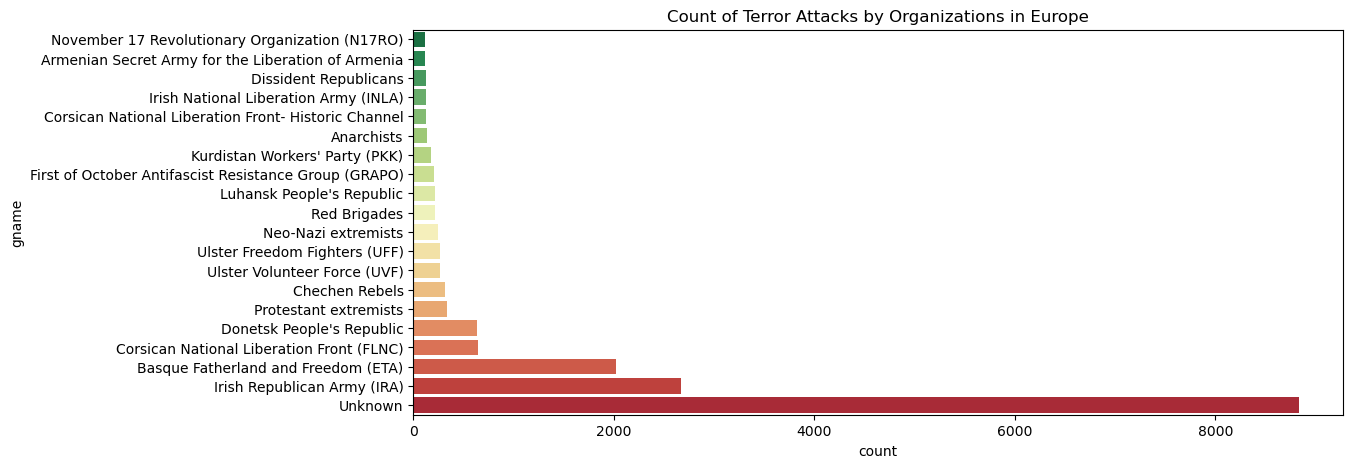

In [15]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='gname', palette='RdYlGn_r',
              order=df['gname'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Organizations in Europe')
plt.show()

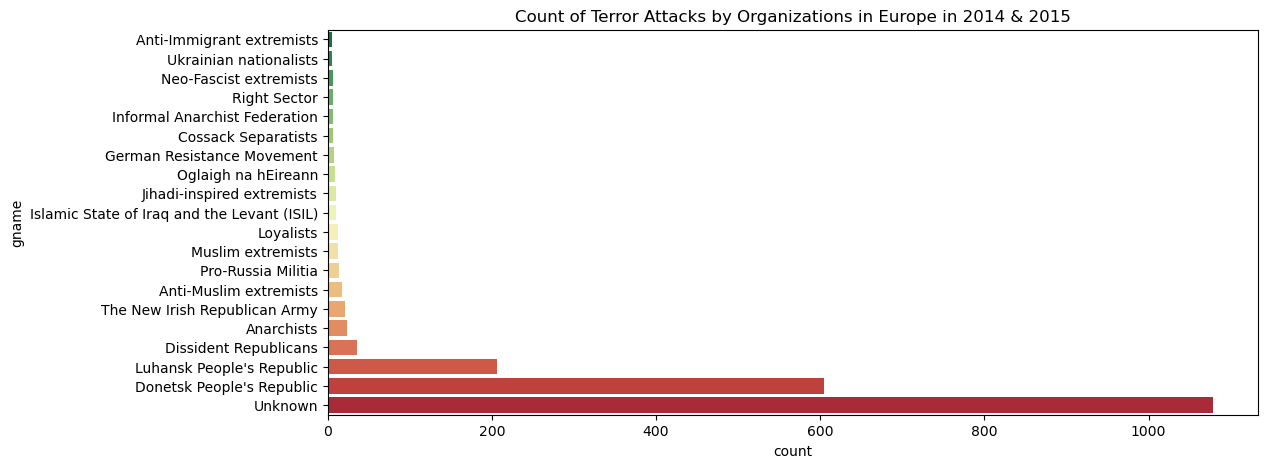

In [16]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='gname', palette='RdYlGn_r',
              order=sub_data['gname'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Organizations in Europe in 2014 & 2015')
plt.show()

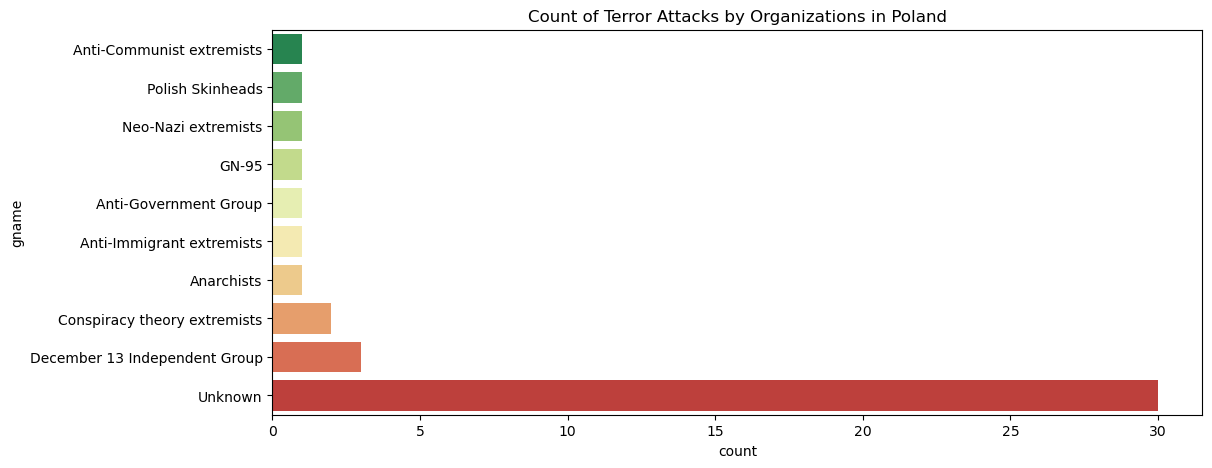

In [17]:
sub_data = df[df['country_txt'] == 'Poland']


plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='gname', palette='RdYlGn_r',
              order=sub_data['gname'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Organizations in Poland')
plt.show()

> - The majority of terror attacks, whether occurring in 2014, 2015, or within Poland, lack information about the responsible organization.

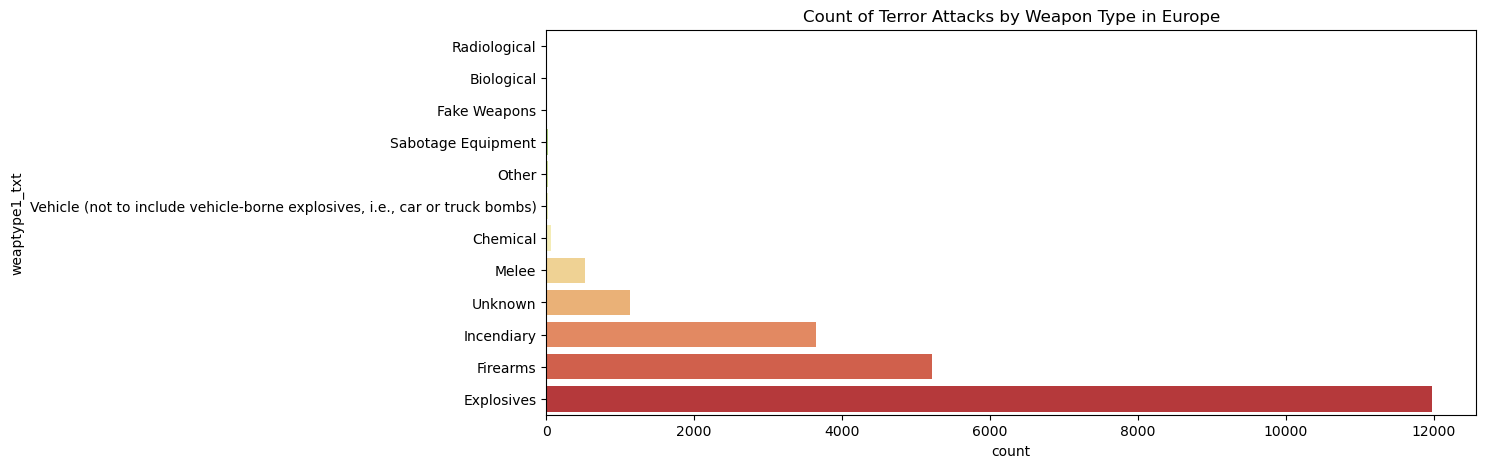

In [18]:

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='weaptype1_txt', palette='RdYlGn_r',
              order=df['weaptype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Weapon Type in Europe')

plt.show()

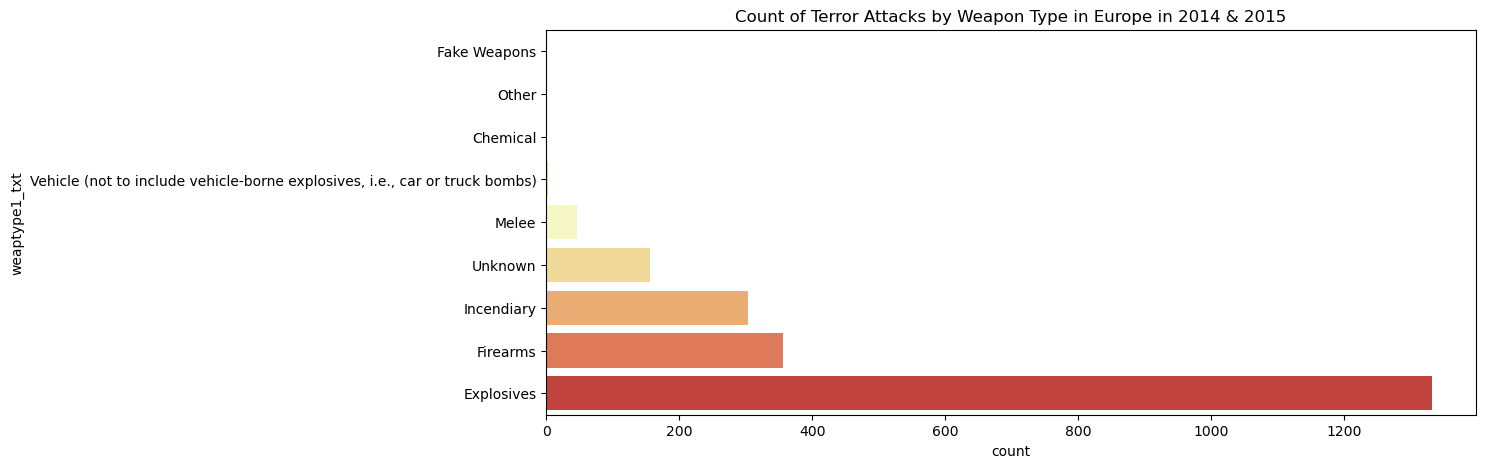

In [19]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='weaptype1_txt', palette='RdYlGn_r',
              order=sub_data['weaptype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Weapon Type in Europe in 2014 & 2015')

plt.show()

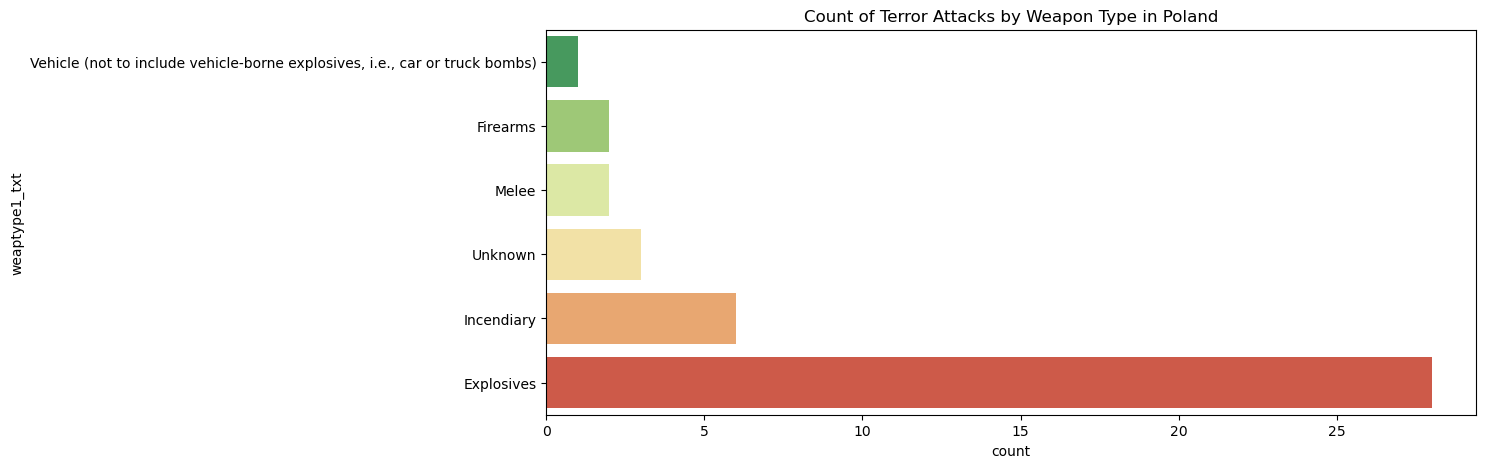

In [20]:
sub_data = df[df['country_txt'] == 'Poland']

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='weaptype1_txt', palette='RdYlGn_r',
              order=sub_data['weaptype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Weapon Type in Poland')

plt.show()

> - Explosives emerge as the most frequently employed weapon type in terror attacks, whether in 2014, 2015, or within the context of Poland.

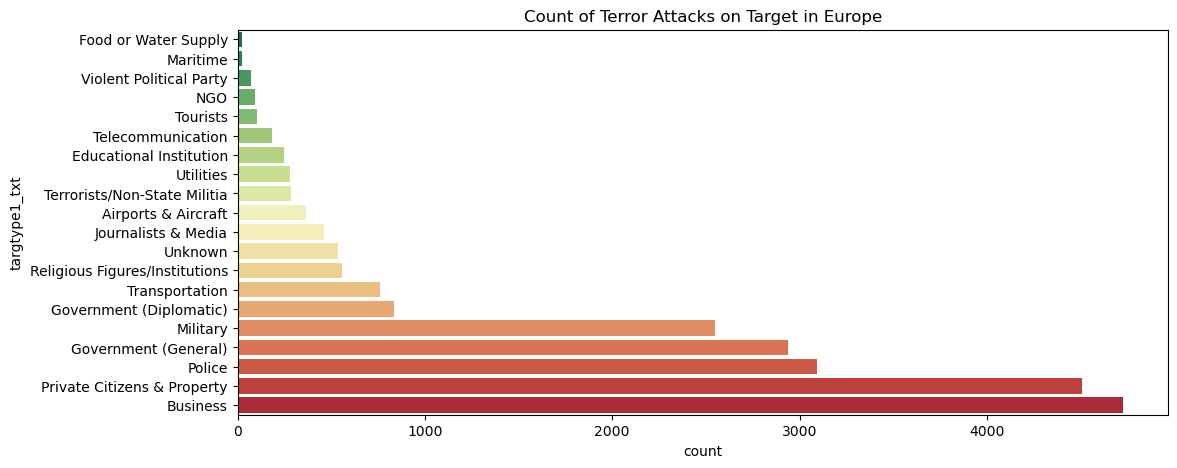

In [21]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='targtype1_txt', palette='RdYlGn_r',
              order=df['targtype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks on Target in Europe')

plt.show()

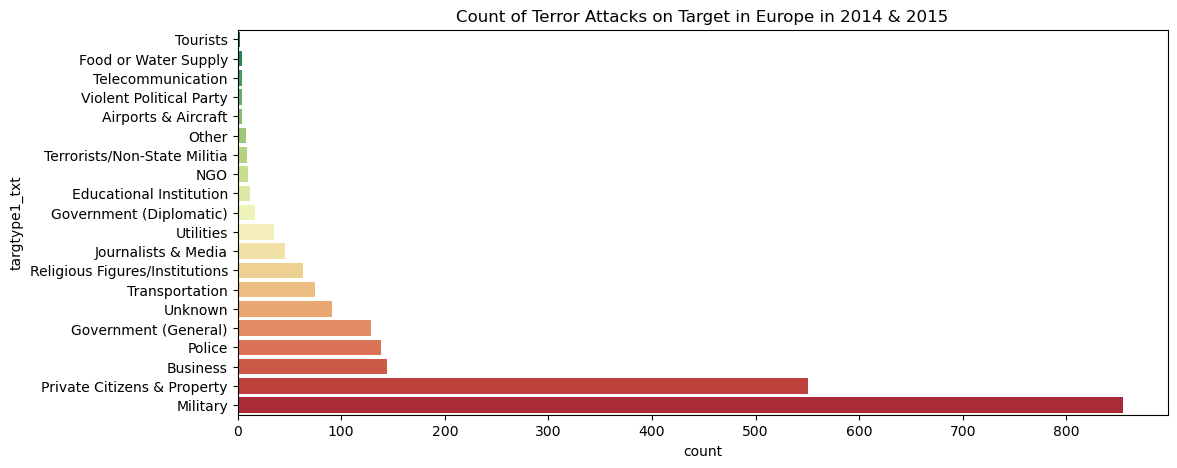

In [22]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='targtype1_txt', palette='RdYlGn_r',
              order=sub_data['targtype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks on Target in Europe in 2014 & 2015')

plt.show()

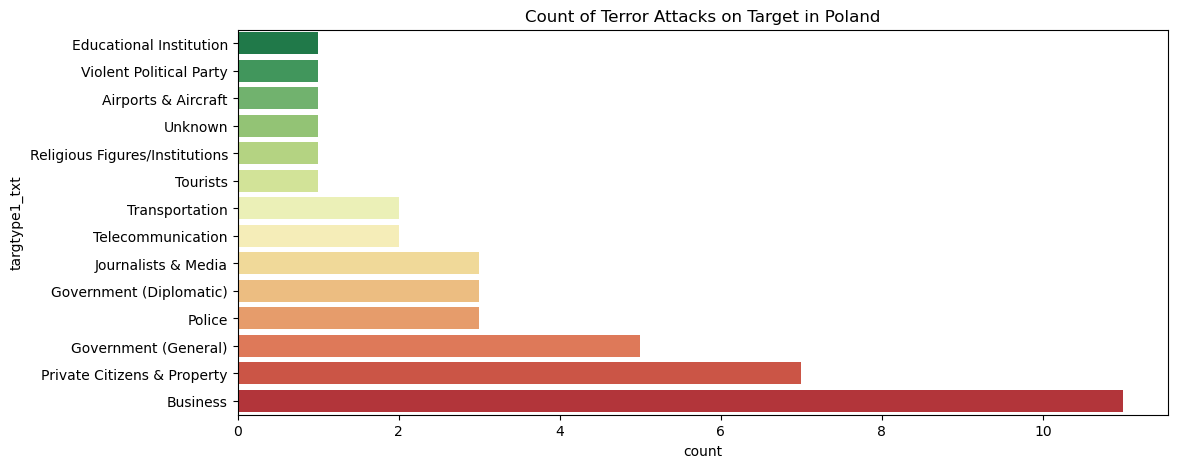

In [23]:
sub_data = df[df['country_txt'] == 'Poland']

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='targtype1_txt', palette='RdYlGn_r',
              order=sub_data['targtype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks on Target in Poland')

plt.show()

> - A substantial portion of terror attacks in both Europe and Poland target businesses and private properties.
> - In 2014 and 2015, the primary targets of terror attacks were military installations, a consequence of the Russia-Ukraine conflict.

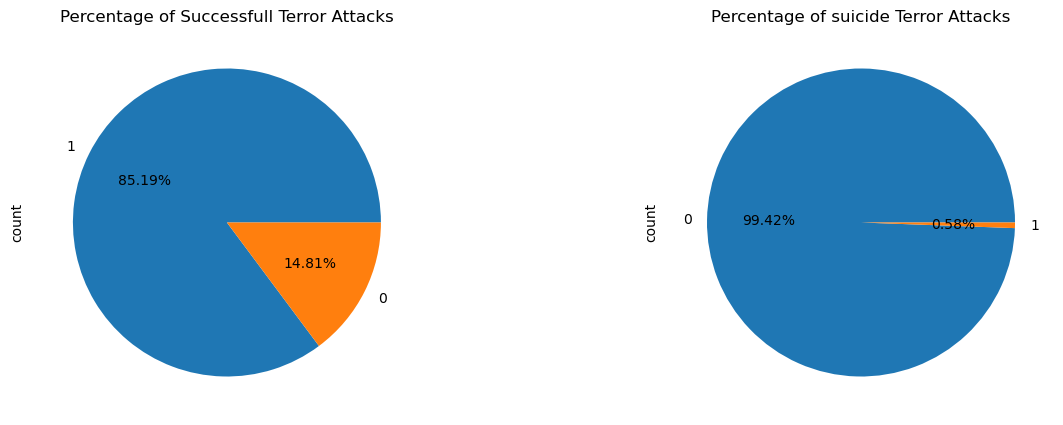

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df['success'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)
ax1.set_title('Percentage of Successfull Terror Attacks')

df['suicide'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2)
ax2.set_title('Percentage of suicide Terror Attacks')

plt.show()

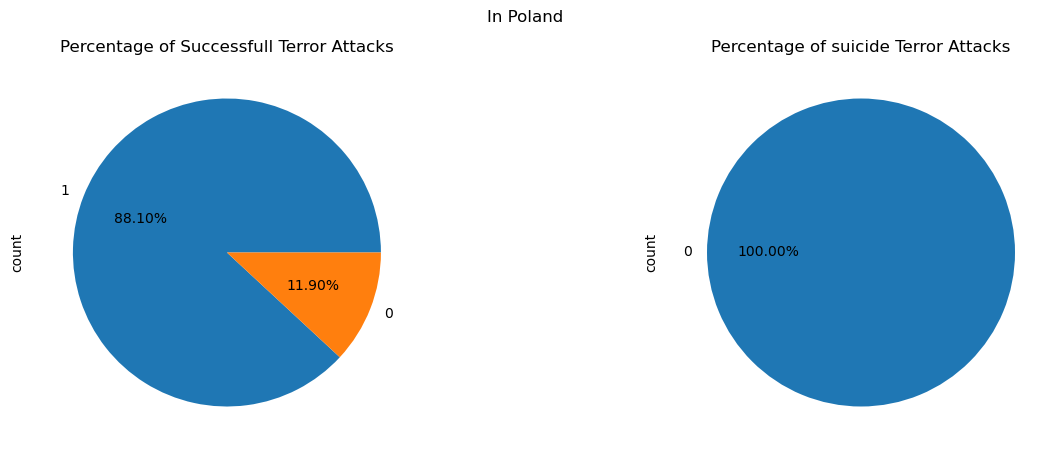

In [26]:
sub_data = df[df['country_txt'] == 'Poland']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sub_data['success'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)
ax1.set_title('Percentage of Successfull Terror Attacks')

sub_data['suicide'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2)
ax2.set_title('Percentage of suicide Terror Attacks')

fig.suptitle('In Poland')
plt.show()

> - In general, 85% of terror attacks are reported as successful, and within Poland, a slightly higher rate of 88% is observed in terms of attack success.
> - Across the dataset, only 0.6% of these terror attacks involved a suicide perpetrator, and notably, there were no instances of suicide perpetrators within Poland.

In [27]:
df['casualities'] = df['nkill'] + df['nwound']

In [31]:
def get_label(total):
    if str(total).lower() == 'nan':
        return 0
    if total == 0:
        return 0
    return 1
df['casualities_category'] = df['casualities'].apply(get_label)

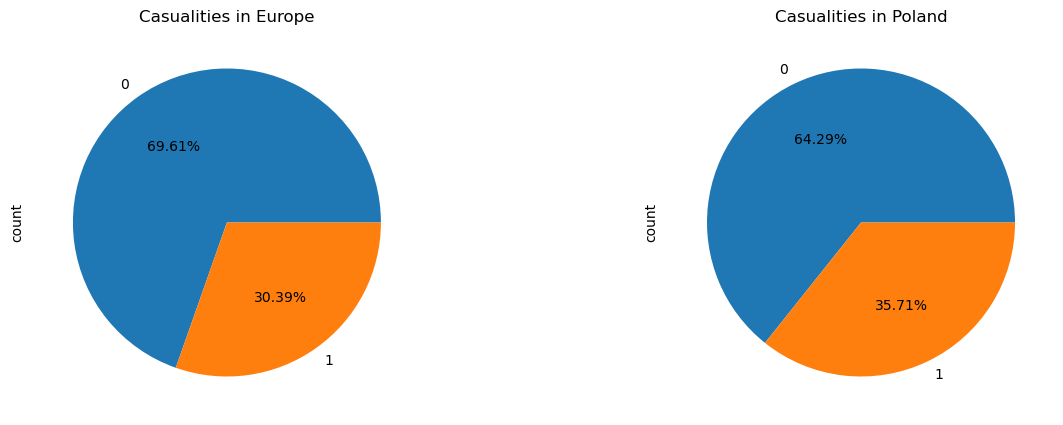

In [137]:
sub_data = df[df['country_txt'] == 'Poland']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df['casualities_category'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)
ax1.set_title('Casualities in Europe')

sub_data['casualities_category'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2)
ax2.set_title('Casualities in Poland')

plt.show()


plt.show()

> - In Europe, 30% of attacks resulted in casualties, while in Poland, a slightly higher percentage of 36%, led to casualties.

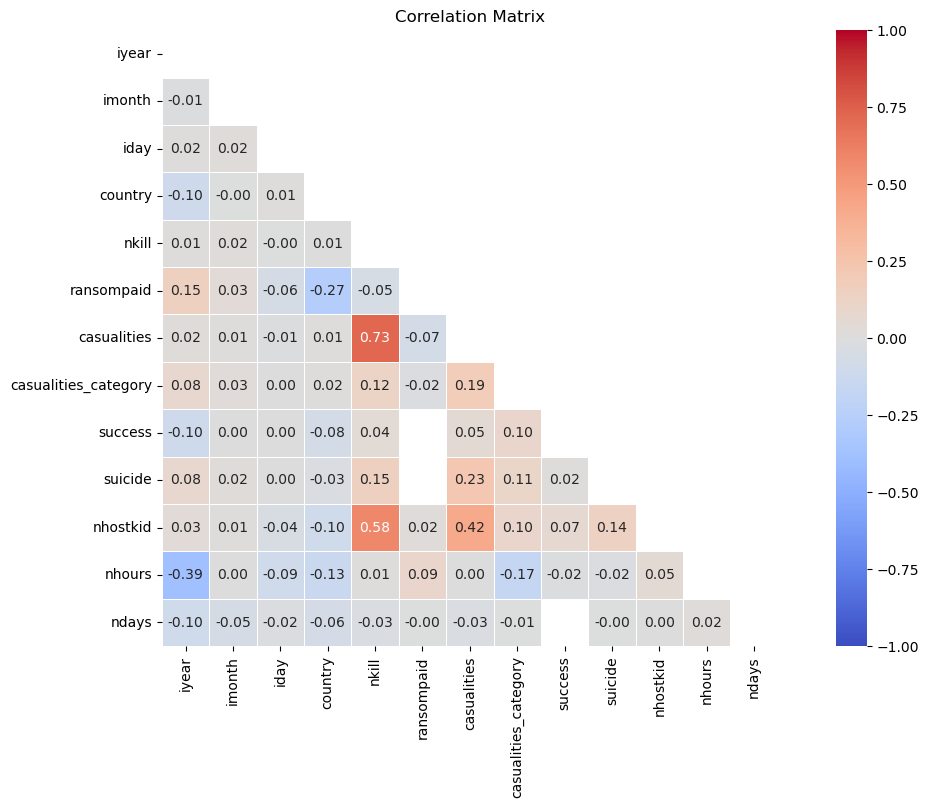

In [65]:
corr = df[["iyear","imonth", "iday","country", "nkill", "ransompaid", "casualities", "casualities_category",
           "success", "suicide", "nhostkid","nhours","ndays"]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, fmt='.2f',
            square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

> - It appears that there is generally a lack of correlation among the variables, except for the evident relationship between casualties and the number of kills. Additionally, a moderate correlation is observed between the number of hostages and the number of kills. These insights suggest that, in many cases, the occurrence of casualties is closely related to the number of fatalities, while the number of hostages may also be associated with the severity of the attack.

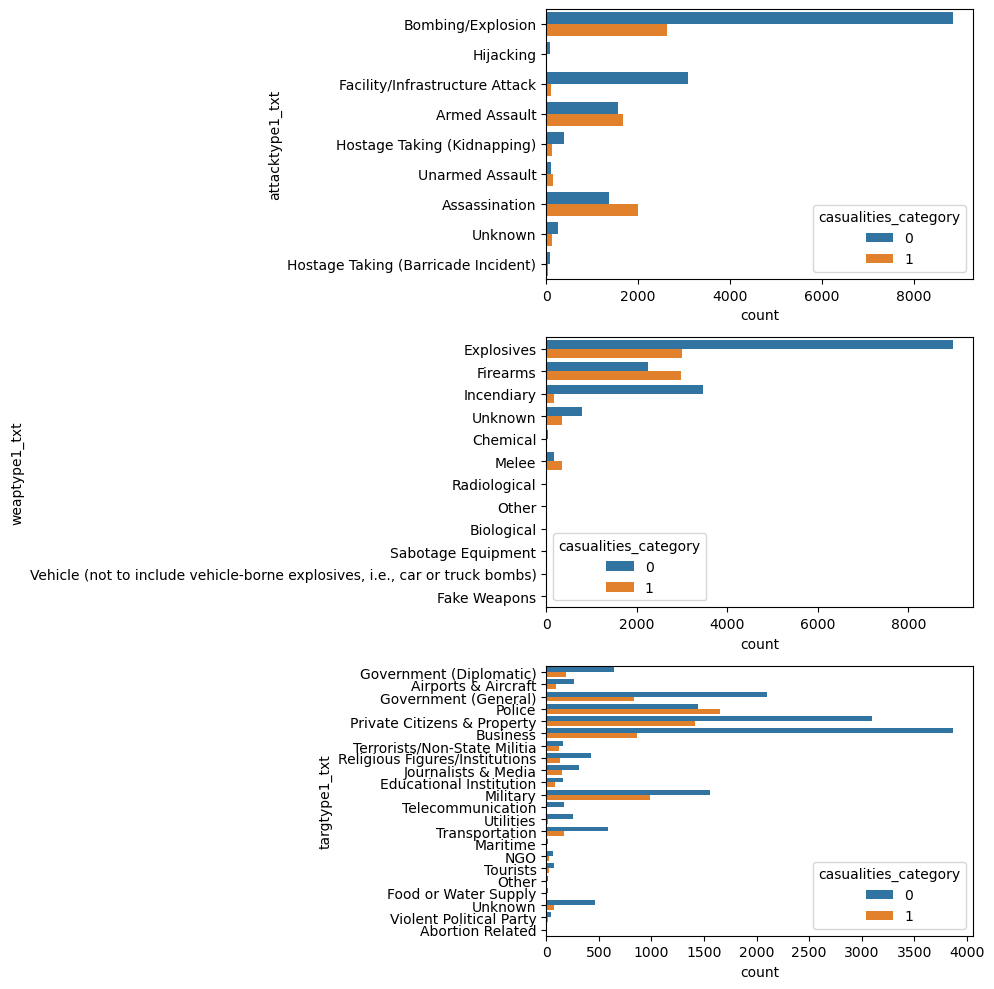

In [42]:
cols = ['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt']
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

for col, ax in zip(cols, axs):
    sns.countplot(data=df, y=col, hue='casualities_category', ax=ax)
fig.tight_layout()
fig.show()

> - It appears that in the majority of cases, there are no casualties associated with various factors such as the type of attack, weapon used, and the target type. However, following are the types where casualties occur more frequently than in other instances. 
    - Attack type of Armed Assualt and Assasination. This implies that assassination attempts were successful most of the time.
    - Weapon of Firearms
    - When target is police.

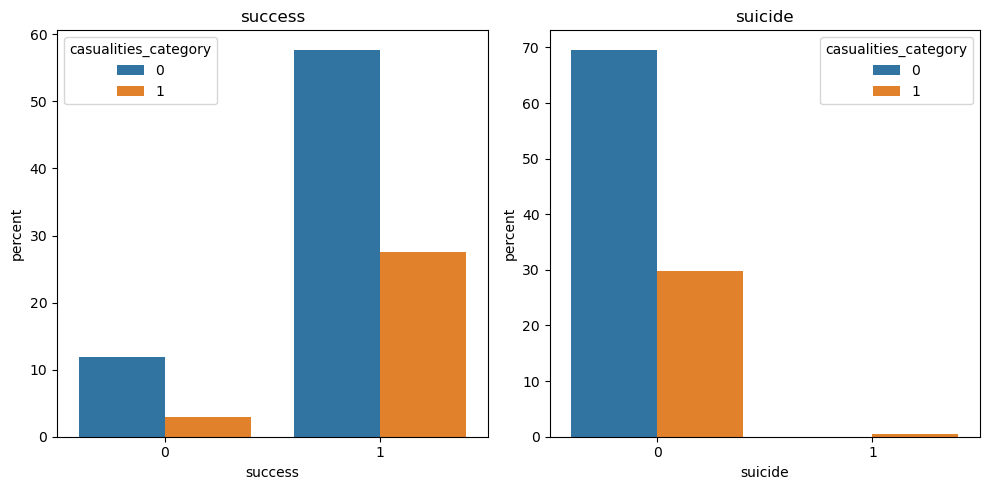

In [138]:
cols = ['success', 'suicide']
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for col, ax in zip(cols, axs):
    sns.countplot(data=df, x=col, hue='casualities_category', stat='percent', ax=ax)
    ax.set_title(col)
fig.tight_layout()
fig.show()

> - the occurrence of successful terror attacks does not always result in casualties. There are instances where attacks deemed successful may not lead to any significant harm or casualties. The success of an attack, in some cases, may be attributed to achieving the intended objectives without causing physical harm or casualties.

## Machine Learning Models
We will now construct various classification models to predict whether a terrorist attack leads to any casualties using following feature
- Type of Attack, Weapon, Target
- Month & Country of the Attack
- Number of hostages
- Success/Failure of the Attack

Following classification models will be built
- Logistic Regression
- Random Forest
- Decision Tree
- Gradient Boosting

To evaluate the performances, we will use the following metrics
1. Accuracy
Accuracy is the ratio of correctly predicted observations to the total observations. It is a common metric for classification problems.
\begin{gather*}
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Observations}}
\end{gather*}

2. Confusion Matrix
A confusion matrix is a table that describes the performance of a classification model. It summarizes the predictions in a format of actual versus predicted categories.

|                   | Predicted Positive | Predicted Negative |
|-------------------|--------------------|--------------------|
| Actual Positive   | True Positive      | False Negative     |
| Actual Negative   | False Positive     | True Negative      |


3. Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions.
\begin{gather*}
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
\end{gather*}

4. Recall (Sensitivity or True Positive Rate)
Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It measures the ability of the model to capture all the positive instances.
\begin{gather*}
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\end{gather*}

5. F1-score
F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

\begin{gather*}
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} 
\end{gather*}

6. ROC-AUC
ROC curve is the plot between Recall(Sensitivity) and the FP rate for various threshold values. The area under curve (AUC) is the area under this ROC curve; it is used to measure the quality of a classification model. The larger the area, the better the performance.


In [147]:
# get these features

X = df[['attacktype1_txt', 'weaptype1_txt', 'success', 'targtype1_txt', 'imonth', 'country_txt', 'nhostkid']].fillna(0)

# convert string data into numerical data
X = pd.get_dummies(X)
# target column
# y = df['success']
y = df['casualities_category']

In [148]:
# split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# apply feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
def evaluate(y_pred, y_pred_proba, model_name):
    '''Utility method to evaluate the classification model'''
    acc = metrics.accuracy_score(y_test, y_pred)
    
    roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    
    print('Accuracy: %.2f' % acc)
    print('ROC-AUC Score: %.2f' % roc_auc)

    print(metrics.classification_report(y_test, y_pred))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
    ax1.set_title(f'Confusion Matrix {model_name}')
    
    metrics.RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=ax2, 
                                             plot_chance_level=True, color="darkorange", name=model_name)
    ax2.set_title(f'ROC-AUC Curve {model_name}')
    fig.show()
    
    res_dict = {}
    res_dict['Model'] = model_name
    res_dict['accuracy'] = acc
    res_dict['roc-auc'] = roc_auc
    res_dict.update(metrics.classification_report(y_test, y_pred, output_dict=True)['macro avg'])
    
    return res_dict


### Logistic Regression

Accuracy: 0.75
ROC-AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3181
           1       0.61      0.47      0.53      1350

    accuracy                           0.75      4531
   macro avg       0.70      0.67      0.68      4531
weighted avg       0.74      0.75      0.74      4531



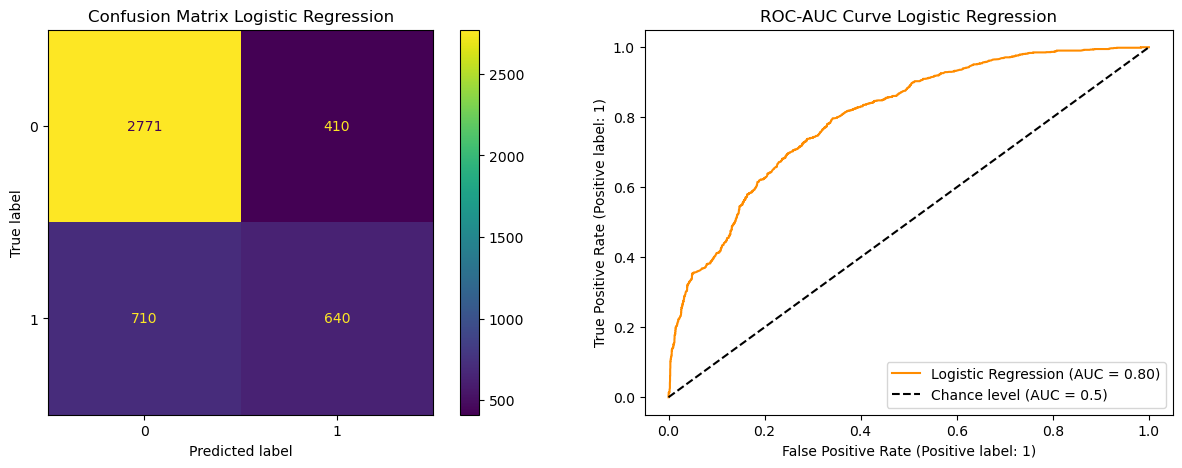

In [150]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_pred_proba = lg.predict_proba(X_test)[:, 1]

results = []
results.append(evaluate(y_pred, y_pred_proba, 'Logistic Regression'))

### Random Forest

Accuracy: 0.77
ROC-AUC Score: 0.81
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      3181
           1       0.78      0.33      0.46      1350

    accuracy                           0.77      4531
   macro avg       0.77      0.64      0.66      4531
weighted avg       0.77      0.77      0.74      4531



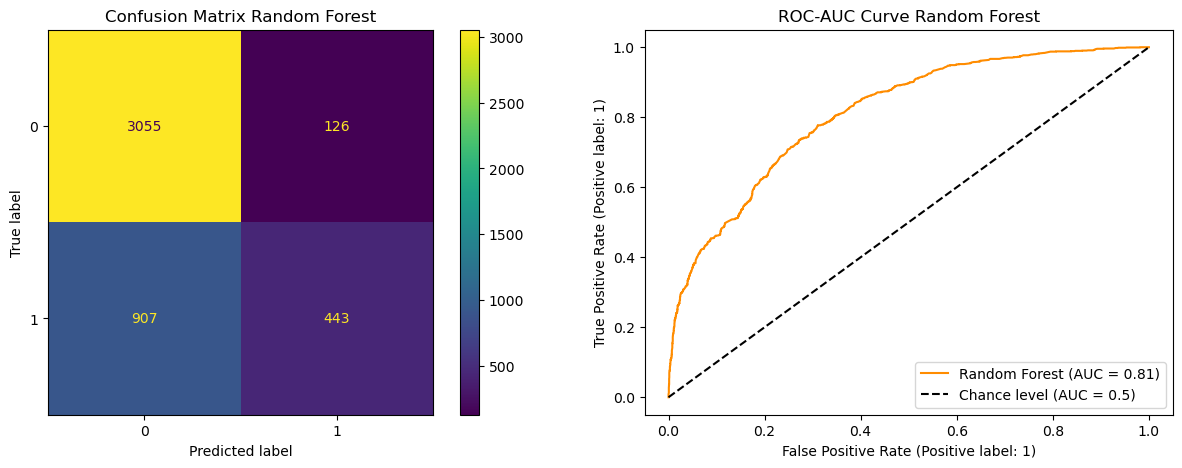

In [151]:
rf = RandomForestClassifier(random_state=0, max_depth=5).fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Random Forest'))

### Decision Tree

Accuracy: 0.78
ROC-AUC Score: 0.77
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3181
           1       0.67      0.54      0.60      1350

    accuracy                           0.78      4531
   macro avg       0.74      0.71      0.73      4531
weighted avg       0.78      0.78      0.78      4531



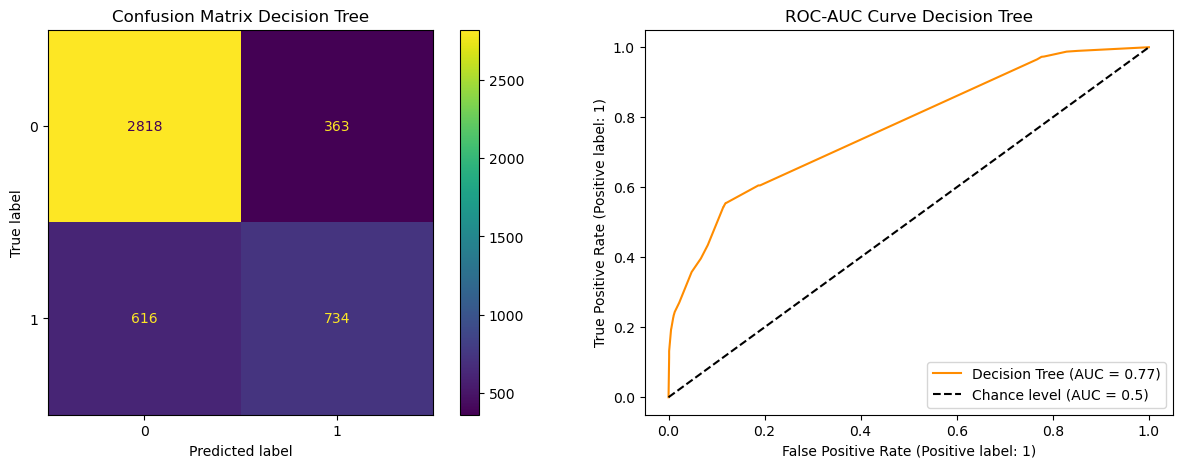

In [152]:
dt = DecisionTreeClassifier(random_state=0, max_depth=5).fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Decision Tree'))

### Gradient Boosting

Accuracy: 0.80
ROC-AUC Score: 0.84
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3181
           1       0.73      0.51      0.60      1350

    accuracy                           0.80      4531
   macro avg       0.78      0.72      0.73      4531
weighted avg       0.79      0.80      0.79      4531



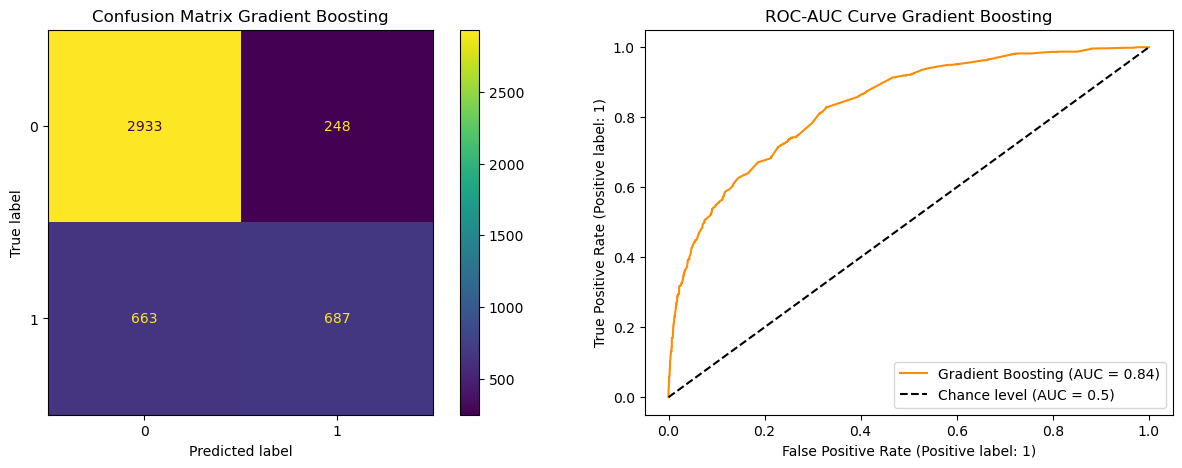

In [153]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Gradient Boosting'))

In [154]:
res_df = pd.DataFrame(results).drop('support', axis=1).sort_values('f1-score').round(3)
res_df

,Model,accuracy,roc-auc,precision,recall,f1-score
1,Random Forest,0.772,0.812,0.775,0.644,0.659
0,Logistic Regression,0.753,0.801,0.703,0.673,0.683
2,Decision Tree,0.784,0.769,0.745,0.715,0.726
3,Gradient Boosting,0.799,0.835,0.775,0.715,0.733


## Fine-Tuning of ML Models

In [158]:
def fine_tune_model(model, param_grid):
    '''Utility method to find best parameters for given machine learning model and find the best one'''
    # train the model with all the combinations of given parameters
    grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    # get the model with best cross-validation score
    best_model = grid_search.best_estimator_
    print("Best Cross Validation Score: %f \nBest Parameters: %s" % (grid_search.best_score_, grid_search.best_params_))
    return best_model

### Logistic Regression

In [159]:
lg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
}

lg = LogisticRegression(random_state=0)

lg_tuned = fine_tune_model(lg, lg_param_grid)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Cross Validation Score: 0.814738 
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


Accuracy: 0.75
ROC-AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3181
           1       0.61      0.47      0.53      1350

    accuracy                           0.75      4531
   macro avg       0.70      0.67      0.68      4531
weighted avg       0.74      0.75      0.74      4531



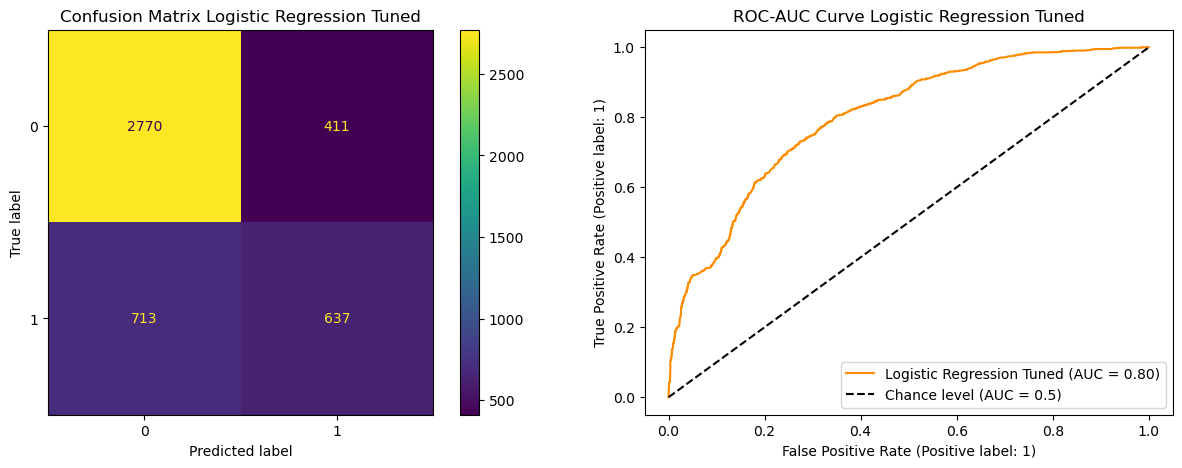

In [160]:
y_pred = lg_tuned.predict(X_test)
y_pred_proba = lg_tuned.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Logistic Regression Tuned'))

### Random Forest

In [161]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15, 20]
}

rf = RandomForestClassifier(random_state=0)
rf_tuned = fine_tune_model(rf, rf_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Cross Validation Score: 0.853365 
Best Parameters: {'max_depth': 15, 'n_estimators': 200}


Accuracy: 0.81
ROC-AUC Score: 0.85
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3181
           1       0.78      0.49      0.60      1350

    accuracy                           0.81      4531
   macro avg       0.80      0.72      0.74      4531
weighted avg       0.80      0.81      0.79      4531



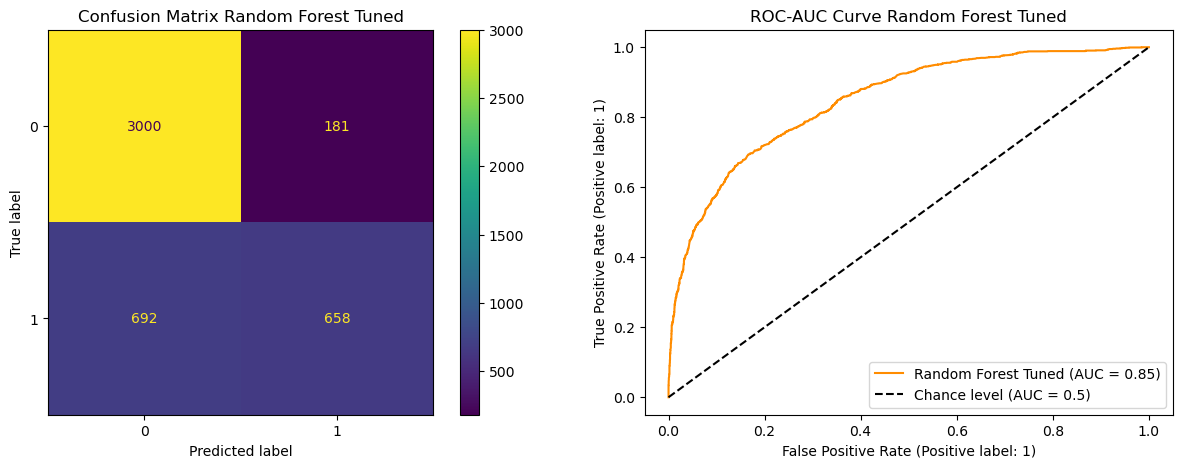

In [162]:
y_pred = rf_tuned.predict(X_test)
y_pred_proba = rf_tuned.predict_proba(X_test)[:, 1]

results.append(evaluate(y_pred, y_pred_proba, 'Random Forest Tuned'))

### Decision Tree

In [163]:
dt_param_grid = { 
    'max_depth' : [None, 5, 10, 15, 20],
    'criterion' : ['gini', 'entropy']
}
dt_tuned = DecisionTreeClassifier(random_state=0)
dt_tuned = fine_tune_model(dt_tuned, dt_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Cross Validation Score: 0.827151 
Best Parameters: {'criterion': 'gini', 'max_depth': 10}


Accuracy: 0.80
ROC-AUC Score: 0.82
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3181
           1       0.71      0.53      0.61      1350

    accuracy                           0.80      4531
   macro avg       0.77      0.72      0.74      4531
weighted avg       0.79      0.80      0.79      4531



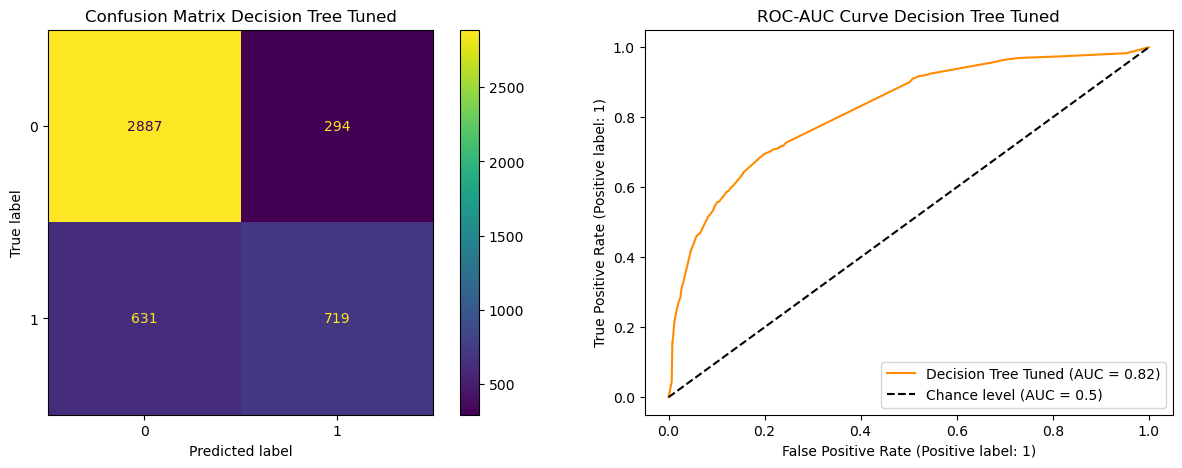

In [164]:
y_pred = dt_tuned.predict(X_test)
y_pred_proba = dt_tuned.predict_proba(X_test)[:, 1]

results.append(evaluate(y_pred, y_pred_proba, 'Decision Tree Tuned'))

### Gradient Boosting

In [165]:
gb_param_grid = {"n_estimators": [100, 200],
                 "subsample":[0.8,0.9,1],
                 "max_features":[0.7,0.8,1]}

gb_tuned = GradientBoostingClassifier(random_state=0)
gb_tuned = fine_tune_model(gb_tuned, gb_param_grid)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Cross Validation Score: 0.850931 
Best Parameters: {'max_features': 0.7, 'n_estimators': 200, 'subsample': 0.8}


Accuracy: 0.80
ROC-AUC Score: 0.84
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3181
           1       0.75      0.51      0.61      1350

    accuracy                           0.80      4531
   macro avg       0.78      0.72      0.74      4531
weighted avg       0.80      0.80      0.79      4531



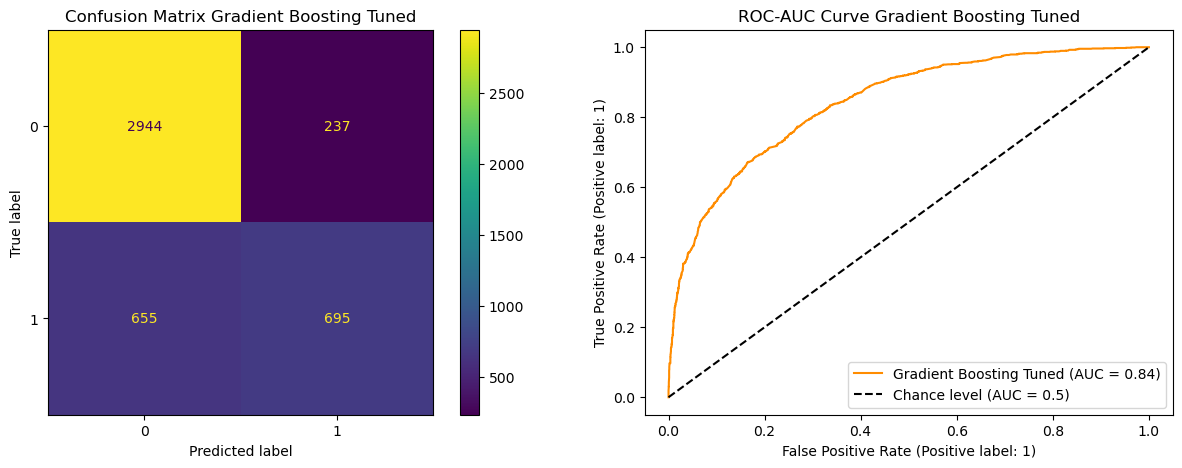

In [166]:
y_pred = gb_tuned.predict(X_test)
y_pred_proba = gb_tuned.predict_proba(X_test)[:, 1]

results.append(evaluate(y_pred, y_pred_proba, 'Gradient Boosting Tuned'))

## Performance Comparison

In [167]:
res_df = pd.DataFrame(results).drop('support', axis=1).sort_values('roc-auc').round(3)
res_df

,Model,accuracy,roc-auc,precision,recall,f1-score
2,Decision Tree,0.784,0.769,0.745,0.715,0.726
4,Logistic Regression Tuned,0.752,0.801,0.702,0.671,0.681
0,Logistic Regression,0.753,0.801,0.703,0.673,0.683
1,Random Forest,0.772,0.812,0.775,0.644,0.659
6,Decision Tree Tuned,0.796,0.821,0.765,0.720,0.735
3,Gradient Boosting,0.799,0.835,0.775,0.715,0.733
7,Gradient Boosting Tuned,0.803,0.841,0.782,0.720,0.739
5,Random Forest Tuned,0.807,0.848,0.798,0.715,0.737


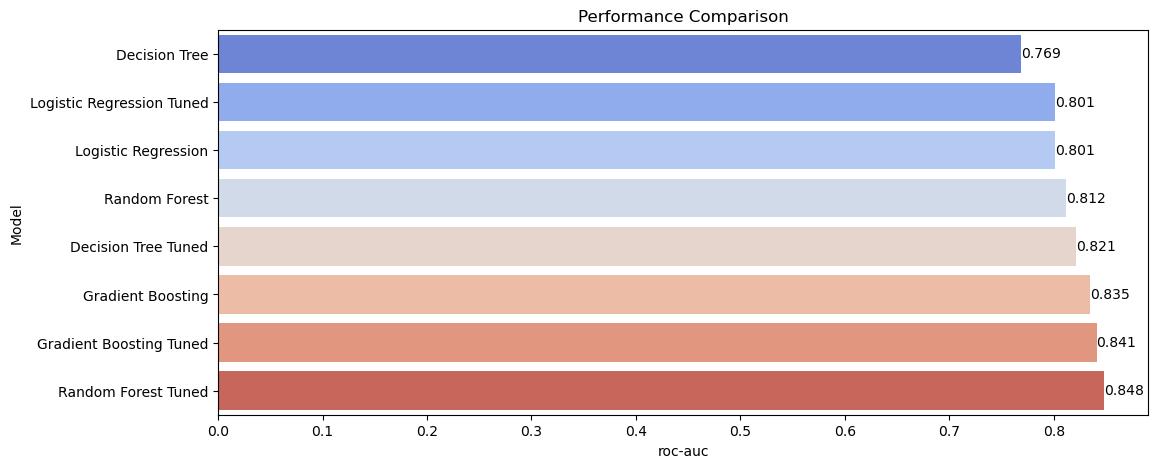

In [168]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=res_df, y='Model', x='roc-auc', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Performance Comparison')
plt.show()

## Feature Importance

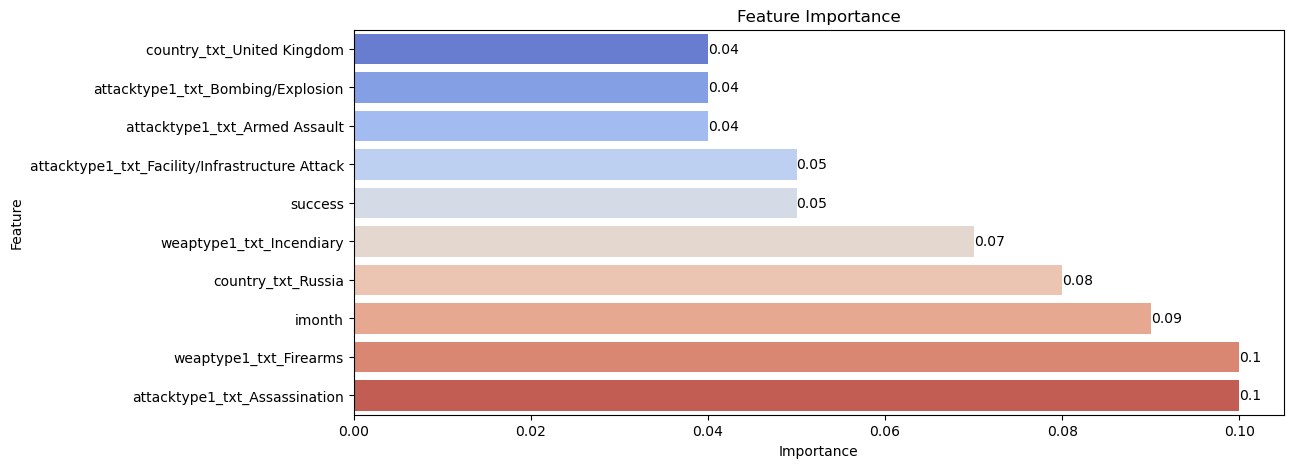

In [169]:
# use tuned random forest to check feature importance
fdf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_tuned.feature_importances_}).round(2)
fdf = fdf.sort_values(['Importance'])
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=fdf.tail(10), y='Feature', x='Importance', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Feature Importance')
plt.show()